In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data = "https://raw.githubusercontent.com/mhemmg/datasets/master/nlp/airline_tweets.csv"
airline_tweets = pd.read_csv(data)

In [3]:
dataForAnalysis = airline_tweets[['airline_sentiment','text']]
dataForAnalysis.to_csv('full.csv',index=False)
dataForAnalysis.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<AxesSubplot:ylabel='airline_sentiment'>

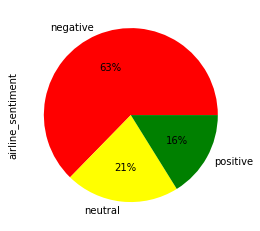

In [4]:
dataForAnalysis.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","yellow","green"])

In [5]:
features = dataForAnalysis.text.values
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [6]:
labels = dataForAnalysis.airline_sentiment.values
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

Limpieza de datos

In [7]:
import re
processed_features = []

for i in features:
    
    # remowing tweet
    processed_feature = re.sub(r'@\w+', ' ', str(i))

    # remowing retweet
    processed_feature = re.sub(r'rt @\w+:', ' ', processed_feature)

    # Eliminación de números
    processed_feature = re.sub("\d+", ' ', processed_feature)

    # Removing links
    processed_feature = re.sub(r'http\S+', ' ', processed_feature)

    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [8]:
processed_features[:10]

[' what said ',
 ' plus you ve added commercials to the experience tacky ',
 ' didn today must mean need to take another trip ',
 ' it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' and it a really big bad thing about it',
 ' seriously would pay flight for seats that didn have this playing it really the only bad thing about flying va',
 ' yes nearly every time fly vx this ear worm won go away ',
 ' really missed prime opportunity for men without hats parody there grezp',
 ' well didn but now do d',
 ' it was amazing and arrived an hour early you re too good to me ']

In [9]:
dictionary = {'labels':dataForAnalysis.airline_sentiment.to_list(), 'features':processed_features}
df = pd.DataFrame(dictionary)
df.to_csv("prepared_data.csv",index=False)
df.head()

,labels,features
0,neutral,what said
1,positive,plus you ve added commercials to the experien...
2,neutral,didn today must mean need to take another trip
3,negative,it really aggressive to blast obnoxious enter...
4,negative,and it a really big bad thing about it


# SKlearn implementation

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sergi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vec = vectorizer.fit_transform(df.features).toarray()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, df.labels, test_size=0.2, random_state=0)

### Random Forest Classifier

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)
print(accuracy_score(y_test, predictions))

0.757172131147541
CPU times: total: 1min 8s
Wall time: 1min 9s


### Linear SVC

In [14]:
%%time
from sklearn.svm import LinearSVC
text_classifier3 = LinearSVC(random_state=0, tol=1e-6)
text_classifier3.fit(X_train, y_train)
predictions3 = text_classifier3.predict(X_test)
print(accuracy_score(y_test, predictions3))

0.7739071038251366
CPU times: total: 203 ms
Wall time: 238 ms


### MLP Classifier

In [15]:
%%time
from sklearn.neural_network import MLPClassifier
text_classifier4 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001 )
text_classifier4.fit(X_train, y_train)
predictions4 = text_classifier4.predict(X_test)
print(accuracy_score(y_test, predictions4))

0.7452185792349727
CPU times: total: 10min 1s
Wall time: 1min 57s


#### Predicciones en los clasificadores

In [16]:
test_features=['I had real bad trip']
test_feature_vec = vectorizer.transform(test_features).toarray()

In [17]:
predictions1 = text_classifier.predict(test_feature_vec)
predictions2 = text_classifier3.predict(test_feature_vec)
predictions3 = text_classifier4.predict(test_feature_vec)
print(predictions1[0])
print(predictions2[0])
print(predictions3[0])

negative
negative
negative
